In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
 
import io_utilities as ioutil

# Interpolation

## What is interpolation?

Many times, data are given only at discrete **control** points such as $(x_0,f(x_0))$, $(x_1,f(x_1))$, $(x_2,f(x_2))$, ..., $(x_{n-1},f(x_{n-1}))$, $(x_n,f(x_n))$. Given this data set, how does one find the value of $f(x_a)$ at any other value of $x_a$ not included at these points? 

Generally speaking, we assume that an underlying continuous function $f(x)$ exists on an interval $J: a \le x \le b$ and passes through the $n+1$ points. Given this assumption, one can find the value of $f(x_a)$ at any other value of $x_a$ falling in $J: a \le x_a \le b$. The process by which $f(x_a)$ is found is termed **interpolation**.

Of course, if a particular point of interest $x_a$ falls outside the range of $J: a \le x \le b$ it is no longer
interpolation but instead is called **extrapolation**, which is a trickier problem to address.

So what kind of function $f(x)$ should one choose? A **polynomial** of degree $N$, or $p_N(x)$, is a common choice for an **interpolating function**. This is largely because polynomials are easy to evaluate, and when you differentiate or integrate them the result is another polynomial.  Furthermore, through the [Weierstrass approximation theorem](https://en.wikipedia.org/wiki/Stone%E2%80%93Weierstrass_theorem), one can show that there is a polynomial of sufficiently high degree $n$ such that 

$$\left| f(x) - p_N(x)\right| < \beta, \tag{1}$$

for some positive real error bound $\beta$.  Thus, how do we find such a polynomial $p_N(x)$?

## Lagrange Interpolation

The solution to this problem dates back to 1795 when [Joseph John Lagrange]() published his tome on the subject (though it was discovered by [Edward Waring](https://en.wikipedia.org/wiki/Edward_Waring) and was a correlary of the work published in 1783 by [Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler)). In this work Lagrange showed that for a given set of points $(x_{j},f(x_j))$ with no two $x_{j}$ values equal, the **Lagrange polynomial** is a **unique** polynomial of lowest degree that assumes at each value $x_{j}$ the corresponding value $f(x_{j})$ (i.e., the functions coincide at each point).

### General Lagrange Interpolation Polynomial

The value of a function $f(x)$ at point $x$ can be approximated by a polynomial of general order $n$ (i.e., $p_n(x)$) according to:

$$f(x) \approx p_n(x) = \sum_{k=0}^{n} L_k(x)f_k = \sum_{k=0}^{n} \frac{l_k(x)}{l_k(x_k)} f_k, \tag{2} $$

where $L_k(x_j) = \delta_{jk}$ (i.e., equals 1 when k=j and zero otherwise) at the node points. This leads to the following values of $l_k(x)$:

$$
\begin{eqnarray}
l_0(x) &=& \Pi_{i=1}^{n} (x-x_i), \tag{3a} \\
l_k(x) &=& \left(\Pi_{i=0}^{n} (x-x_i)\right)\left(\Pi_{j=k+1}^{n} (x-x_j)\right),\quad 0<k<n\tag{3b}\\
l_n(x) &=& \Pi_{i=0}^{n-1} (x-x_i), \tag{3c}\\
\end{eqnarray}
$$

where we have used the Pi summation to express the multiplication of terms (i.e., $\Pi_{k=3}^{5}k = 3\cdot4\cdot5 = 60$).  Evidently, at the control points $x_j$ we see that equation 2 reduces to 

$$f(x_j) \approx \sum_{k=0}^{n} \frac{l_k(x_j)}{l_k(x_k)} f_k = f_j. \tag{5} $$

### Interpolation Error Estimate

The interpolation error estimate $\epsilon_n(x)$ for a general function $f(x)$ is given by:

$$ \epsilon_n(x) = f(x)-p_n(x) = \Pi_{k=0}^{n} (x-x_k)\cdot \left.\frac{f^{(n+1)}}{(n+1)!}\right|_{x} \tag{6} $$

where $f^{(n+1)}$ is the $(n+1)$ derivative of $f$ evaluated at $x$, and $!$ represents the factorial symbol.  The maximum error is given by the largest values of $\left|f^{(n+1)}\right|$.

Note that equation 6 gives the error for **any** polynomial interpolation method if $f(x)$ has a continuous $(n+1)$ derivative. 

## Example 1 - Linear Interpolation

**Q:** You have a $f(x) = \sin x$ function sampled at the following $(x,f(x))$ locations: $(0,0)$, $(\pi/4,1/sqrt{2})$ and $(\pi/2,1)$. What are the values of the function at $x_a=\pi/8$ and $x_b=3\pi/8$ **linear** Lagrange interpolation at the given control points?

**A:** We can use equation 2 with $n=1$ to write

$$p_1(x) = L_0(x)f_0 + L_1(x) f_1 = \left(\frac{x-x_1}{x_0-x_1}\right) f_0+\left(\frac{x-x_0}{x_1-x_0}\right) f_1 \tag{7a} $$

Using $x_0=0$ and $x_1=\pi/4$, we can calculate the approximate value of the function at $x_a=\pi/8$ via:

$$p_1(\pi/8) = \left(\frac{x-x_1}{x_0-x_1}\right) f_0+\left(\frac{x-x_0}{x_1-x_0}\right) f_1 = \left(\frac{\pi/8-\pi/4}{0-\pi/4}\right) 0 + \left(\frac{\pi/8-0}{\pi/4-0}\right) \frac{1}{\sqrt{2}}=\frac{1}{2\sqrt{2}}. \tag{7b} $$

Now using $x_0=\pi/4$ and $x_1=\pi/2$, we can calculate the approximate value of the function at $x_b=3\pi/8$ via:

$$p_1(\pi/8) = \left(\frac{x-x_1}{x_0-x_1}\right) f_0+\left(\frac{x-x_0}{x_1-x_0}\right) f_1 = \left( \frac{3\pi/8-\pi/2}{\pi/4-\pi/2}\right) \frac{1}{\sqrt{2}}+\left(\frac{3\pi/8-\pi/4}{\pi/2-\pi/4}\right) 1 = \frac{1}{2}\left(1+\frac{1}{\sqrt{2}}\right). \tag{7c} $$

Let's look at these plotted in the function below.  The black line and stars show the true $f(x) = \sin x$ function and the three control points, respectively.  The red line shows the linear Lagrange interpolating function, while the red stars show the approximations at $x_a=\pi/8$ and $x_b=3\pi/8$. 

According to equation 6, the error associated with these approximations is:

$$\epsilon_1(x_a) = \Pi_{k=0}^{1}(x_a-x_k)\left.\frac{f^2}{2!}\right|_{x=x_a} = (\pi/8-0)(\pi/8-\pi/4)\frac{(-\sin \pi/8)}{2} = \frac{\pi^2 \sin \pi/8}{128}=0.0295, \tag{7d}$$
$$\epsilon_1(x_b) = \Pi_{k=0}^{1}(x_b-x_k)\left.\frac{f^2}{2!}\right|_{x=x_b} = (3\pi/8-\pi/4)(3\pi/8-\pi/2)\frac{(-\sin 3\pi/8)}{2} = \frac{\pi^2 \sin 3\pi/8}{128}=0.07123, \tag{7e}$$

which are quite close to the exact error estimates of $\epsilon(x_a)=0.02913$ and $\epsilon(x_b)=0.07032$, respectively.

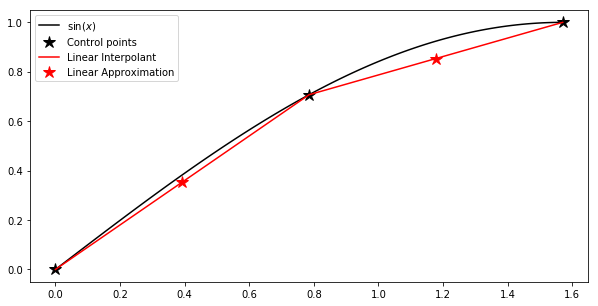

In [2]:
# . . Create true function f(x) using sympy
x = symbols('x')
equation = sin(x)

# . . Create three critical points
criticalpointsX=list((0,np.pi/4,np.pi/2))
criticalpointsY=[equation.subs(x,a) for a in criticalpointsX]

# . . Bring to discrete world
xx = np.linspace(0,np.pi/2,100)
yy = lambdify(x,equation)(xx)

# . . Plot 
plt.figure(figsize=(10,5))
plt.plot(xx,np.transpose(yy),'k')
plt.plot(criticalpointsX,criticalpointsY,'k*',markersize=12)
plt.plot([0,np.pi/4,np.pi/2],[0,1/(np.sqrt(2)),1],'r-',markersize=12)
plt.plot([np.pi/8,3*np.pi/8],[1/(2*np.sqrt(2)),0.5*(1+1/(np.sqrt(2)))],'r*',markersize=12)
plt.legend(['$\sin(x)$','Control points','Linear Interpolant','Linear Approximation'])
plt.show()

## Example 2 - Quadratic Interpolation

**Q:** Repeat Example 1, but using a **quadratic** Lagrange interpolation approach.

**A:** We can use equation 2 with $n=1$ to write

$$p_2(x) = L_0(x) f_0 + L_1(x) f_1 + L_2(x) f_2 = 
\left(\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}\right) f_0+
\left(\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}\right) f_1+
\left(\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}\right) f_2 \tag{8a} $$

Using $x_0=0$, $x_1=\pi/4$ and $x_2=\pi/2$, we can calculate the approximate value of the function at $x_a=\pi/8$ via:

$$p_2(\pi/8) = 
\left(\frac{(\pi/8-\pi/4)(\pi/8-\pi/2)}{(0    -\pi/4)(0    -\pi/2)}\right) 0+
\left(\frac{(\pi/8-    0)(\pi/8-\pi/2)}{(\pi/4-    0)(\pi/4-\pi/2)}\right) \frac{1}{\sqrt2}+
\left(\frac{(\pi/8-    0)(\pi/8-\pi/4)}{(\pi/2-    0)(\pi/2-\pi/4)}\right) 1 = \frac{\left(3\sqrt{2}-1\right)}{8} \tag{8b} $$

Similarly, at $x_b=3\pi/8$ we can calculate:

$$p_2(3\pi/8) = 
\left(\frac{(3\pi/8-\pi/4)(3\pi/8-\pi/2)}{(0    -\pi/4)(0    -\pi/2)}\right) 0+
\left(\frac{(3\pi/8-    0)(3\pi/8-\pi/2)}{(\pi/4-    0)(\pi/4-\pi/2)}\right) \frac{1}{\sqrt2}+
\left(\frac{(3\pi/8-    0)(3\pi/8-\pi/4)}{(\pi/2-    0)(\pi/2-\pi/4)}\right) 1 = \frac{3\left(1+\sqrt{2}\right)}{8} \tag{8c} $$

Let's look at these plotted in the function below.  The black line and stars show the true $f(x) = \sin x$ function and the three control points, respectively.  The red line shows the linear Lagrange interpolating function, while the red stars show the approximations at $x_a=\pi/8$ and $x_b=3\pi/8$. 

We can now investigate the errors:

$$\epsilon_2(x_a) = \sin( \pi/8)-\frac{\left(3\sqrt{2}-1\right)}{8}=-0.0226467\tag{8d} $$
$$\epsilon_2(x_b) = \sin(3\pi/8)-\frac{3\left(1+\sqrt{2}\right)}{8}=0.0185494 \tag{8e} $$

which are more accurate than the previous estimates $\epsilon_1(x_a)=0.0295$ and $\epsilon_1(x_b)=0.07032$.

The figure below shows the **quadratic** interpolation results as green stars, and also plots the **linear** interpolation results as red stars.  Evidently, the quadratic interpolation results are more accurate!

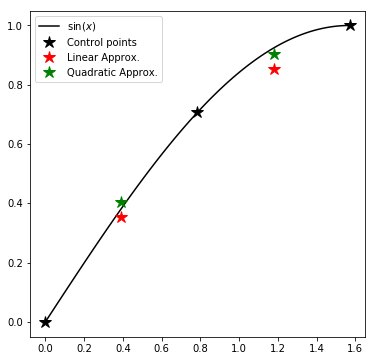

In [3]:
# . . Create true function f(x) using sympy
x = symbols('x')
equation = sin(x)

# . . Create three critical points
criticalpointsX=list((0,np.pi/4,np.pi/2))
criticalpointsY=[equation.subs(x,a) for a in criticalpointsX]

# . . Bring to discrete world
xx = np.linspace(0,np.pi/2,100)
yy = lambdify(x,equation)(xx)

# . . Plot 
plt.figure(figsize=(6,6))
plt.plot(xx,np.transpose(yy),'k')
plt.plot(criticalpointsX,criticalpointsY,'k*',markersize=12)
plt.plot([np.pi/8,3*np.pi/8],[1/(2*np.sqrt(2)),0.5*(1+1/(np.sqrt(2)))],'r*',markersize=12)
plt.plot([np.pi/8,3*np.pi/8],[(3*np.sqrt(2)-1)/8,3*(1+np.sqrt(2))/8],'g*',markersize=12)
plt.legend(['$\sin(x)$','Control points','Linear Approx.','Quadratic Approx.'])
plt.show()

## Numerical Exercises

(1) Write a Lagrangian interpolation function that inputs:
   * (n+1) samples of $(x_i,f(x_i))$;
   * a set of output points $y_i$ at which to calculate $f(y_i)$; and
   * the order of the Lagrange interpolant $N$
that then outputs the interpolated values $(y_i,f(y_i))$.  Make sure to think about how to handle the end points.  To emphasize code reuse, put your interpolation function into a separate file and then import it for use.

(2) Validate your Lagrange interpolation code against a chirp function $f(x) = \sin(x+\sin 0.1x)$ between $x\in[0,10\pi]$ sampled every $\Delta x = \pi/10$ for various ranges of $N$.  Compute the error in your approximations. How do the results change as a function of $N$?

(3) Investigate how the error in your interpolation results varies as a function of $\Delta x$ for a fixed $N$. Explain what trends you observe and give an explanation for why this is.

(4) Test out your interpolation algorithm on the following topography data set acquired across the San Andreas Fault (the *profile* variable).
   * Plot the topography data; compute its Fourier transform and then plot the Fourier magnitude
   * Extract a random 50% subset of the topographic data points and then apply your interpolation algorithm (assuming $N=1$) to reconstruct the missing points. Compute the Fourier transform of the interpoloated data and plot the Fourier magnitude.  How does the spectrum compare with the original one?
   * Repeat the above test but with higher orders of $N$. Do you see any improvement in the results?

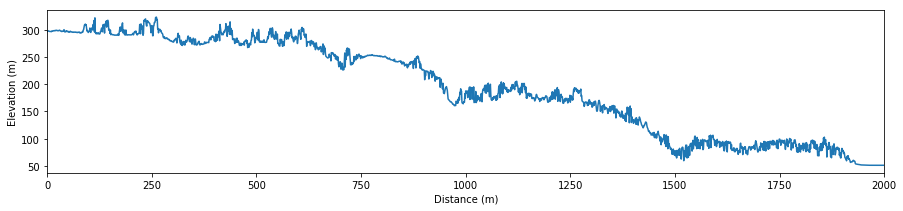

In [4]:
def plot_topo(topo,xlab,ylab):
    plt.plot(profile)
    plt.xlim(0,len(profile))
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()  

# . . Read in TIN LIDAR topography file
# . . You can use "help(ioutil.Read_In_TIN)" to find out more information
test = ioutil.Read_In_TIN("./data/SanAndreas.tin.asc",False)

# . . Extract profile and plot
profile = test.data[100:2100,60]
plt.figure(figsize=(15,3))
plot_topo(profile,'Distance (m)','Elevation (m)')


### Computational Considerations

The Lagrangian interpolation approach yields a fairly good approximation to many signals; however, the quality of the interpolation result depends on the effectively sampling of the data and the underlying structure of the function that you are trying to interpolate.  Generally speaking, the lower "frequency" the function is, the lower number of polynomial that you need to represent it with. However, for functions that are effectively sampled near Nyquist, you will need a high degree of polynomial to represent it.  

Numerically speaking, the **computational complexity** of Lagrangian interpolation of order $N$ is given by

$$Cost_{Lagrange_N} = N(N+1)^2 N_{pts} \tag{9} $$

where $N_{pts}$ is the number of points in the 1D array.  Thus, as you get to higher and higher order of approximations, the computational effort per grid point is roughly proportional to $N^3$. This turns out to be very costly for large $N$!  

A further challenge is that as one progresses to higher values of $N$ the interpolating polynomials tend to increasingly oscillate, which can lead to **numerical instability**.  Note that fundamental work in this area of numerical analysis was completed by [Carl Runge](https://en.wikipedia.org/wiki/Carl_David_Tolm%C3%A9_Runge), a famous German mathematician who is better known for his work in ordinary differential equations (ODEs).

## Cubic Spline Interpolation

